# **ECS7024 Statistics for Artificial Intelligence and Data Science - Coursework III**

## **Introduction**

This paper's analysis is focused on different areas/regions of the United Kingdom with respect to property prices. The analysis will first prepare the datasets the work will be based on, visualise and comment on the most noticable trends and price changes with respect to certain property types. The paper then carries out a Chi-Squared Test in order to see whether changes in the prices of flats have affected all the regions similarly between a specified time interval. 

### **Table of Content**
* **Part 1:** Loading and preparing the data
    * **Section 1.1:** Separating region data from area data
    * **Section 1.2:** Assigning a region to each area_data price record
    * **Section 1.3:** Handling missing values in area and region dataframes
* **Part 2:** Analysing Trends in Regions
    * **Section 2.1:** Visualising trends in regions
    * **Section 2.2:** Observations on Trends
* **Part 3:** Analysing Price Changes in Areas
    * **Section 3.1:** Calculating flats' property price change (between July 2017 and 2018) in each area
    * **Section 3.2:** Visualising change in flat property prices in each area¶
    * **Section 3.3:** Observations on Results  
* **Part 4:** Statistical Analysis
    * **Section 4.1:** Creating a dataframe by crosstabulation for Chi-square test¶
    * **Section 4.2:** Chi-square Test Analysis
    * **Section 4.3:** Interpreting the Results
    


### **Introducing the datasets**
* `Dataset 1:` **'average-property-price.csv'** contains information about the average price of properties (4 types) over 36 months in different ares of the country. The dataset contains the following fields:

| Name     |      Description           |
|:--------------|:-----------------------|
|Date    | A date, which is the first of the month, between September 1st 2016 and August 1st 2019. 36 months in total.  |
|Area          | The name of an area (or region – see below)                |
|Code    | The code for the area (or region – see below)|
|Detached         | Average sale price of a detached property in this area in the month|
|Semi        | Same, for semi-detached property. |
|Terraced      | Same, for a terraced property |
|Flat  |  Same, for a flat. |

* `Dataset 2:` **'location-codes.csv'** shows which region each area belongs to. Note that here is some overlap between the two files, such as the names of the areas and regions. This file can be used to determine which of the nine regions each area is in. 

| Name     |      Description           |
|:--------------|:-----------------------|
|AuthorityCode    | Same as 'Code' in 'average-property-price.csv' |
|AuthorityName         | Same as 'Area' in 'average-property-price.csv'           |
|RegionCode    | The code for the Region|
|RegionName        | Name of the Region|


## **Part 1: Loading and preparing the data**

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy.stats as stats

In [2]:
# Loading the datasets
area_data = pd.read_csv('average-property-price.csv') 
area_data = area_data.assign(Month = pd.to_datetime(area_data['Date'], dayfirst=True)).drop(labels='Date', axis=1)
location_data = pd.read_csv('location-codes.csv')

In [3]:
# Checking the general form of the respective dataframes
print("Area data: ")
display(area_data.head())
print()
print("Location data: ")
display(location_data.head())

Area data: 


,Area,Code,Detached,Semi,Terraced,Flat,Month
0,Hartlepool,E06000001,179323.3934,108357.4457,77192.90613,62078.20672,2016-09-01
1,Hartlepool,E06000001,178880.9745,107765.1346,76294.05974,61893.84174,2016-10-01
2,Hartlepool,E06000001,179855.0608,107886.9468,76066.73993,61909.33647,2016-11-01
3,Hartlepool,E06000001,182847.8194,109312.3743,77019.16134,62919.44401,2016-12-01
4,Hartlepool,E06000001,177454.1433,105828.3642,74522.27530,60770.80795,2017-01-01



Location data: 


,AuthorityCode,AuthorityName,RegionCode,RegionName
0,E06000001,Hartlepool,E12000001,North East
1,E06000002,Middlesbrough,E12000001,North East
2,E06000003,Redcar and Cleveland,E12000001,North East
3,E06000004,Stockton-on-Tees,E12000001,North East
4,E06000005,Darlington,E12000001,North East


### **Section 1.1: Separating region data from area data**
Region data observations can be find by filtering out the rows in 'area_data' with a prefix of 'E12'. The filtered rows are then saved to variable 'region_data'.

In [4]:
# Seperate the region data (with 'E12' prefix codes) from the area data (other prefixes)
region_data = area_data.loc[area_data['Code'].str.contains('E12')]
area_data = area_data.drop(region_data.index, axis=0)

### **Section 1.2: Assigning a region to each area_data price record**

In [5]:
# Checking how many unique regions are stored in location_data
location_data.RegionName.unique()

array(['North East', 'North West', 'Yorkshire and The Humber',
       'East Midlands', 'West Midlands', 'South West', 'East of England',
       'South East', 'London'], dtype=object)

As a first step, location_data entries are grouped together according to their 'RegionName', resulting in nine separate variables storing the appropriate instances (see below).

In [6]:
# Finding all AuthorityCode for North East
north_east = location_data[location_data['RegionName'] == 'North East']

# Finding all AuthorityCode for North West
north_west = location_data[location_data['RegionName'] == 'North West']

# Finding all AuthorityCode for Yorkshire and The Humber
yorkshire_and_the_humber = location_data[location_data['RegionName'] == 'Yorkshire and The Humber']

# Finding all AuthorityCode for East Midlands
east_midlands = location_data[location_data['RegionName'] == 'East Midlands']

# Finding all AuthorityCode for West Midlands
west_midlands = location_data[location_data['RegionName'] == 'West Midlands']

# Finding all AuthorityCode for South West
south_west = location_data[location_data['RegionName'] == 'South West']

# Finding all AuthorityCode for East of England
east_of_england = location_data[location_data['RegionName'] == 'East of England']

# Finding all AuthorityCode for South East
south_east = location_data[location_data['RegionName'] == 'South East']

# Finding all AuthorityCode for London
london = location_data[location_data['RegionName'] == 'London']

Since 'AuthorityCode' of location_data and 'Code' of area_data refers to the same thing, the next thing is to store each 'AuthorityCode' of location_data in a dictionary, linked to their respective RegionNames. The below code does that with respect to the nine regions above separated already. Once the dictionary is ready, a new 'Region' column is created in area_data, where based on area_data's 'Code' (matching AuthorityCode in the dictionary), a function 'maps' the corresponding regions from the dictionary. 

In [7]:
dictionary = {'E06000001': 'North East',
              'E06000002': 'North East',
              'E06000003': 'North East',
              'E06000004': 'North East',
              'E06000005': 'North East',
              'E06000047': 'North East',
              'E06000057': 'North East',
              'E06000021': 'North East',
              'E06000022': 'North East',
              'E06000023': 'North East',
              'E06000024': 'North East',
              'E06000037': 'North East',
              'E06000006': 'North West',
              'E06000007': 'North West',
              'E06000008': 'North West',
              'E06000009': 'North West',
              'E06000049': 'North West',
              'E06000050': 'North West',
              'E08000001': 'North West',
              'E08000001': 'North West',
              'E08000002': 'North West',
              'E08000003': 'North West',
              'E08000004': 'North West',
              'E08000005': 'North West',
              'E08000006': 'North West',
              'E08000007': 'North West',
              'E08000008': 'North West',
              'E08000009': 'North West',
              'E08000010': 'North West',
              'E08000011': 'North West',
              'E08000012': 'North West',
              'E08000013': 'North West',
              'E08000014': 'North West',
              'E08000015': 'North West',
              'E10000006': 'North West',
              'E10000017': 'North West',
              'E06000010': 'Yorkshire and The Humber',
              'E06000011': 'Yorkshire and The Humber',
              'E06000012': 'Yorkshire and The Humber',
              'E06000013': 'Yorkshire and The Humber',
              'E06000014': 'Yorkshire and The Humber',
              'E08000016': 'Yorkshire and The Humber',
              'E08000017': 'Yorkshire and The Humber',
              'E08000018': 'Yorkshire and The Humber',
              'E08000019': 'Yorkshire and The Humber',
              'E08000032': 'Yorkshire and The Humber',
              'E08000033': 'Yorkshire and The Humber',
              'E08000034': 'Yorkshire and The Humber',
              'E08000035': 'Yorkshire and The Humber',
              'E08000036': 'Yorkshire and The Humber',
              'E10000023': 'Yorkshire and The Humber',
              'E06000015': 'East Midlands',
              'E06000016': 'East Midlands',
              'E06000017': 'East Midlands',
              'E06000018': 'East Midlands',
              'E10000007': 'East Midlands',
              'E10000018': 'East Midlands',
              'E10000019': 'East Midlands',
              'E10000021': 'East Midlands',
              'E10000024': 'East Midlands',
              'E06000019': 'West Midlands',
              'E06000020': 'West Midlands',
              'E06000021': 'West Midlands',
              'E06000051': 'West Midlands',
              'E08000025': 'West Midlands',
              'E08000026': 'West Midlands',
              'E08000027': 'West Midlands',
              'E08000028': 'West Midlands',
              'E08000029': 'West Midlands',
              'E08000030': 'West Midlands',
              'E08000031': 'West Midlands',
              'E10000028': 'West Midlands',
              'E10000031': 'West Midlands',
              'E10000034': 'West Midlands',
              'E06000022': 'South West',
              'E06000023': 'South West',
              'E06000024': 'South West',
              'E06000025': 'South West',
              'E06000026': 'South West',
              'E06000027': 'South West',
              'E06000028': 'South West',
              'E06000029': 'South West',
              'E06000030': 'South West',
              'E06000052': 'South West',
              'E06000053': 'South West',
              'E06000054': 'South West',
              'E06000058': 'South West',
              'E06000059': 'South West',
              'E10000008': 'South West',
              'E10000009': 'South West',
              'E10000013': 'South West',
              'E10000027': 'South West',
              'E06000031': 'East of England',
              'E06000032': 'East of England',
              'E06000033': 'East of England',
              'E06000034': 'East of England',
              'E06000055': 'East of England',
              'E06000056': 'East of England',
              'E10000003': 'East of England',
              'E10000003': 'East of England',
              'E10000012': 'East of England',
              'E10000015': 'East of England',
              'E10000020': 'East of England',
              'E10000029': 'East of England',
              'E06000035': 'South East',
              'E06000036': 'South East',
              'E06000037': 'South East',
              'E06000038': 'South East',
              'E06000039': 'South East',
              'E06000040': 'South East',
              'E06000041': 'South East',
              'E06000042': 'South East',
              'E06000043': 'South East',
              'E06000044': 'South East',
              'E06000045': 'South East',
              'E06000046': 'South East',
              'E10000002': 'South East',
              'E10000011': 'South East',
              'E10000014': 'South East',
              'E10000016': 'South East',
              'E10000025': 'South East',
              'E10000030': 'South East',
              'E10000032': 'South East',
              'E09000001': 'London',
              'E09000002': 'London',
              'E09000003': 'London',
              'E09000004': 'London',
              'E09000005': 'London',
              'E09000006': 'London',
              'E09000007': 'London',
              'E09000008': 'London',
              'E09000009': 'London',
              'E09000010': 'London',
              'E09000011': 'London',
              'E09000012': 'London',
              'E09000013': 'London',
              'E09000014': 'London',
              'E09000015': 'London',
              'E09000016': 'London',
              'E09000017': 'London',
              'E09000018': 'London',
              'E09000019': 'London',
              'E09000020': 'London',
              'E09000021': 'London',
              'E09000022': 'London',
              'E09000023': 'London',
              'E09000024': 'London',
              'E09000025': 'London',
              'E09000026': 'London',
              'E09000027': 'London',
              'E09000028': 'London',
              'E09000029': 'London',
              'E09000030': 'London',
              'E09000031': 'London',
              'E09000032': 'London',
              'E09000033': 'London'}

# Mapping area_data's 'Code' to dictionary's regions
area_data['Region'] = area_data['Code'].map(dictionary)

# Checking if area_data dataframe has got updated
area_data.head()

,Area,Code,Detached,Semi,Terraced,Flat,Month,Region
0,Hartlepool,E06000001,179323.3934,108357.4457,77192.90613,62078.20672,2016-09-01,North East
1,Hartlepool,E06000001,178880.9745,107765.1346,76294.05974,61893.84174,2016-10-01,North East
2,Hartlepool,E06000001,179855.0608,107886.9468,76066.73993,61909.33647,2016-11-01,North East
3,Hartlepool,E06000001,182847.8194,109312.3743,77019.16134,62919.44401,2016-12-01,North East
4,Hartlepool,E06000001,177454.1433,105828.3642,74522.27530,60770.80795,2017-01-01,North East


### **Section 1.3: Handling missing values in area and region dataframes**

In [8]:
# Missing values in area_data
print('Number of missing values in area_data:')
for col in area_data.columns:
    print('\t%s: %d' % (col,area_data[col].isna().sum()))

print()
# Missing values in region_data
print('Number of missing values in region_data:')
for col in region_data.columns:
    print('\t%s: %d' % (col,region_data[col].isna().sum()))

Number of missing values in area_data:
	Area: 0
	Code: 0
	Detached: 36
	Semi: 36
	Terraced: 20
	Flat: 0
	Month: 0
	Region: 180

Number of missing values in region_data:
	Area: 0
	Code: 0
	Detached: 0
	Semi: 0
	Terraced: 0
	Flat: 0
	Month: 0


Running the above code reveals that there are no missing values in the region_data, however, area_data's 'Detached', 'Semi', 'Terraced' and 'Region' columns all have some missing datapoints. 

In [9]:
# Changing the formatting of numeric values in datasets
pd.options.display.float_format = "{:.2f}".format

A new variable 'missing_data_rows' is created which stores all the rows that contain any missing values. 

In [10]:
# Storing missing rows in variable 'missing_data_rows'
missing_data_rows = area_data[area_data.isnull().any(axis=1)]

Printing out all the rows that contain missing values, it seems clear that there are two problems to be dealt with.

**`Problem 1`**: Missing values in the 'Region' column. To fix it, the 'Area' values can be looked up and find their corresponding 'Region' value. Once they are found, the dataframe can be updated by assigning a  'Region' value to the respective missing 'Area' names.

* `Newcastle upon Tyne` --> North East (Wikipedia)
* `North Tyneside` --> North East (Wikipedia)
* `South Tyneside` --> North East (Wikipedia)
* `Sunderland` --> North East (Wikipedia)
* `Gateshead` --> North East (Wikipedia)

In [11]:
# Correcting Region's missing values
area_data.loc[area_data['Area'] == 'Newcastle upon Tyne', 'Region'] = 'North East'
area_data.loc[area_data['Area'] == 'North Tyneside', 'Region'] = 'North East'
area_data.loc[area_data['Area'] == 'South Tyneside', 'Region'] = 'North East'
area_data.loc[area_data['Area'] == 'Sunderland', 'Region'] = 'North East'
area_data.loc[area_data['Area'] == 'Gateshead', 'Region'] = 'North East'

In [12]:
# Checking if Region's missing values are handled (yes, they are)
missing_data_rows = area_data[area_data.isnull().any(axis=1)]
print(missing_data_rows.to_string())

                Area       Code  Detached  Semi   Terraced      Flat      Month  Region
3276  City of London  E09000001       NaN   NaN 1189233.71 777891.98 2016-09-01  London
3277  City of London  E09000001       NaN   NaN 1195010.12 790055.21 2016-10-01  London
3278  City of London  E09000001       NaN   NaN 1229507.61 815992.90 2016-11-01  London
3279  City of London  E09000001       NaN   NaN 1217012.80 809149.85 2016-12-01  London
3280  City of London  E09000001       NaN   NaN 1227434.57 817654.09 2017-01-01  London
3281  City of London  E09000001       NaN   NaN 1189660.06 818093.52 2017-02-01  London
3282  City of London  E09000001       NaN   NaN 1176573.14 851416.07 2017-03-01  London
3283  City of London  E09000001       NaN   NaN 1238739.42 903551.85 2017-04-01  London
3284  City of London  E09000001       NaN   NaN 1277795.87 937307.42 2017-05-01  London
3285  City of London  E09000001       NaN   NaN 1174213.34 928316.50 2017-06-01  London
3286  City of London  E09000001 

**`Problem 2`**: Missing values in the 'Detached', 'Semi', and 'Terraced' columns. 

**Problem:** All missing values originate in the 'City of London' Area. Since there is none in that area (City of London) that could be taken as a proxy to calculate a median for the missing values, I have to find out which other Area could be the closest to the truth. 


Once I find the most similar (in terms of prices) London area to the 'City of London', I can start checking seperately the median/mean values of the 'Detached'/ 'Semi'/ and 'Terraced' properties of these most similar areas and assign their median for the 'City of London' properties. 


* **Solving the Problem:** <br>
`(a)` Group together all the areas in London to be able to see their descriptive statistics. <br>
`(b)` Additionally, check which Zone each area belong to, as suspicion is that the further in in the city they are, the more expensive properties get. <br>

In [13]:
# Grouping together all areas in region London
london_properties = area_data[(area_data.Region == 'London')]
display(london_properties)

,Area,Code,Detached,Semi,Terraced,Flat,Month,Region
3276,City of London,E09000001,NaN,NaN,1189233.71,777891.98,2016-09-01,London
3277,City of London,E09000001,NaN,NaN,1195010.12,790055.21,2016-10-01,London
3278,City of London,E09000001,NaN,NaN,1229507.61,815992.90,2016-11-01,London
3279,City of London,E09000001,NaN,NaN,1217012.80,809149.85,2016-12-01,London
3280,City of London,E09000001,NaN,NaN,1227434.57,817654.09,2017-01-01,London
...,...,...,...,...,...,...,...,...
4459,City of Westminster,E09000033,2740913.06,2368017.63,1587328.54,920859.77,2019-04-01,London
4460,City of Westminster,E09000033,2808865.95,2426628.08,1632620.81,942108.53,2019-05-01,London
4461,City of Westminster,E09000033,2727822.65,2353337.05,1589651.07,917925.56,2019-06-01,London
4462,City of Westminster,E09000033,2620648.41,2259597.98,1532004.30,883664.26,2019-07-01,London


In [14]:
# Computing the median for each area in London in terms of 'Detached', 
# 'Semi', 'Terraced' and 'Flat' properties (sorted in an ascending order)
print("Grouping by 'Area' feature and computing the median for each numerical features:")
grouped_london = london_properties.groupby('Area').median()
grouped_london_sorted = grouped_london.sort_values(by='Detached', ascending=True)
grouped_london_sorted


Grouping by 'Area' feature and computing the median for each numerical features:


,Detached,Semi,Terraced,Flat
Area,,,,
Barking and Dagenham,528778.81,370607.13,313985.69,230274.74
Bexley,566693.62,423093.53,338190.08,239735.49
Newham,615616.85,490604.67,375364.39,346214.24
Havering,689528.28,434988.33,341865.89,237356.09
Tower Hamlets,715252.64,661496.16,590981.44,437603.67
Hounslow,754282.96,535932.08,459831.47,319531.11
Croydon,754853.38,484801.51,355825.27,274389.92
Waltham Forest,759940.44,641784.53,471327.05,353311.14
Hillingdon,786134.01,498329.24,388291.51,276987.20


Although it seems obvious that the closer one gets to the centre of London the more expensive properties get, the ten lowest and most expensive areas where checked how far they are from the centre of London (using Google Maps).

#### The ten lowest priced London areas and their distance from centre of London:
* `Barking and Dagenham`: 9 miles
* `Bexley`: 14.9 miles
* `Newham`: 8.6 miles
* `Havering`: 17.6 miles
* `Havering`: 17.6 miles
* `Tower Hamlets`: 6.1 miles
* `Hounslow`: 14.8 miles
* `Croydon`: 10.8 miles
* `Waltham Forest`: 17.4 miles
* `Hillingdon`: 18.1 miles

#### The ten highest priced London areas and their distance from centre of London:
* `Hammersmith and Fulham`: 5.3 miles
* `Richmond upon Thames`: 9.2 miles
* `Merton`: 9.7 miles
* `Southwark`: 3.2 miles
* `Islington`: 3.9 miles
* `Wandsworth`: 5.7 miles
* `Haringey`: 7.0 miles
* `Camden`: 2.9 miles
* `City of Westminster`: 2.1 miles
* `Kensington and Chelsea`: 3.5 miles
* `+1: City of London`: 1.8 miles

Since property prices generally get higher as their location is in close proximity of Central London, and that City of London is the closest to that point - taking the average of the top three highest property price areas' (i.e., Camden, City of Westminster, Kensington and Chelsea) median seems reasonable. 

In [15]:
# Median price of 'Detached' properties using camden, westminster and kensington_chelsea
detached_median = (2823850.56 + 2841310.90 + 3500738.56) / 3
detached_median = 3055300.0066666664
# Median price of 'Semi' properties using camden, westminster and kensington_chelsea
semi_median = (1924419.07 + 2429518.68 + 3428665.65) / 3
semi_median = 2594201.1333333333

# Replacing missing rows for 'Detached' and 'Semi' with median values calculated above from the three selected nearest areas
# (Camden, Westminster, Chelsea)

area_data['Detached'] = area_data['Detached'].fillna(3055300.0066666664)
area_data['Semi'] = area_data['Semi'].fillna(2594201.1333333333)

`(c)` The median value for 'Terraced' properties in area 'City of London' is based on 16 observations that are available, which seems adequate to carry over to the missing values. 

In [16]:
# Median price of 'Terraced' properties using available data for 'City of London'
terraced_median = 1232198.04

area_data['Terraced'] = area_data['Terraced'].fillna(1232198.04)

Before proceeding to the further parts of the analysis, a quick check should be done to see whether all missing values have been dealt with properly. The below code does just that.

In [17]:
# Missing values in area_data (Checking if they got updated)
print('Number of missing values in area_data:')
for col in area_data.columns:
    print('\t%s: %d' % (col,area_data[col].isna().sum()))

print()

Number of missing values in area_data:
	Area: 0
	Code: 0
	Detached: 0
	Semi: 0
	Terraced: 0
	Flat: 0
	Month: 0
	Region: 0



## **Part 2: Analysing Trends in Regions**

### **Section 2.1: Visualising trends in regions**
The below plots exhibit the trends of flat and detached property prices in the given nine regions over the 36 months. 

In [18]:
# Adding a Timestamp variable to region_data, whilst simultaneously dropping 
# the 'Month' column
import datetime

def makeTime(row):
    return pd.Timestamp(row.Month)

region_data_time = region_data.assign(Time = region_data.apply(makeTime, axis=1))
region_data_time = region_data_time.drop(labels=['Month'],axis=1)
region_data_time = region_data_time.set_index(keys='Time')
display(region_data_time)

,Area,Code,Detached,Semi,Terraced,Flat
Time,,,,,,
2016-09-01,North East,E12000001,208117.17,125683.34,101385.69,89361.51
2016-10-01,North East,E12000001,208519.12,125464.32,99998.54,89716.49
2016-11-01,North East,E12000001,210555.49,126082.11,100433.81,90065.72
2016-12-01,North East,E12000001,211728.72,127186.06,102150.75,91195.50
2017-01-01,North East,E12000001,205942.71,123088.45,98112.30,88170.43
...,...,...,...,...,...,...
2019-04-01,South West,E12000009,392886.05,257833.82,211378.14,164580.13
2019-05-01,South West,E12000009,391955.48,257312.40,210797.91,163699.90
2019-06-01,South West,E12000009,395661.86,259252.70,211065.78,165268.34


As a first step, regions must be separated in the dataset (under the confusingly named variable 'Area'), forming nine groups with each region. 

In [19]:
# Seperating regions in the dataset by 'Area'
northeast = region_data_time[(region_data_time.Area == 'North East')]
northwest = region_data_time[(region_data_time.Area == 'North West')]
yorkshire = region_data_time[(region_data_time.Area == 'Yorkshire and The Humber')]
eastmidlands = region_data_time[(region_data_time.Area == 'East Midlands')]
westmidlands = region_data_time[(region_data_time.Area == 'West Midlands Region')]
eastofengland = region_data_time[(region_data_time.Area == 'East of England')]
london = region_data_time[(region_data_time.Area == 'London')]
southeast = region_data_time[(region_data_time.Area == 'South East')]
southwest = region_data_time[(region_data_time.Area == 'South West')]



Next, nine plots are created, each showcasing flat and detached property prices in their respective regions. 

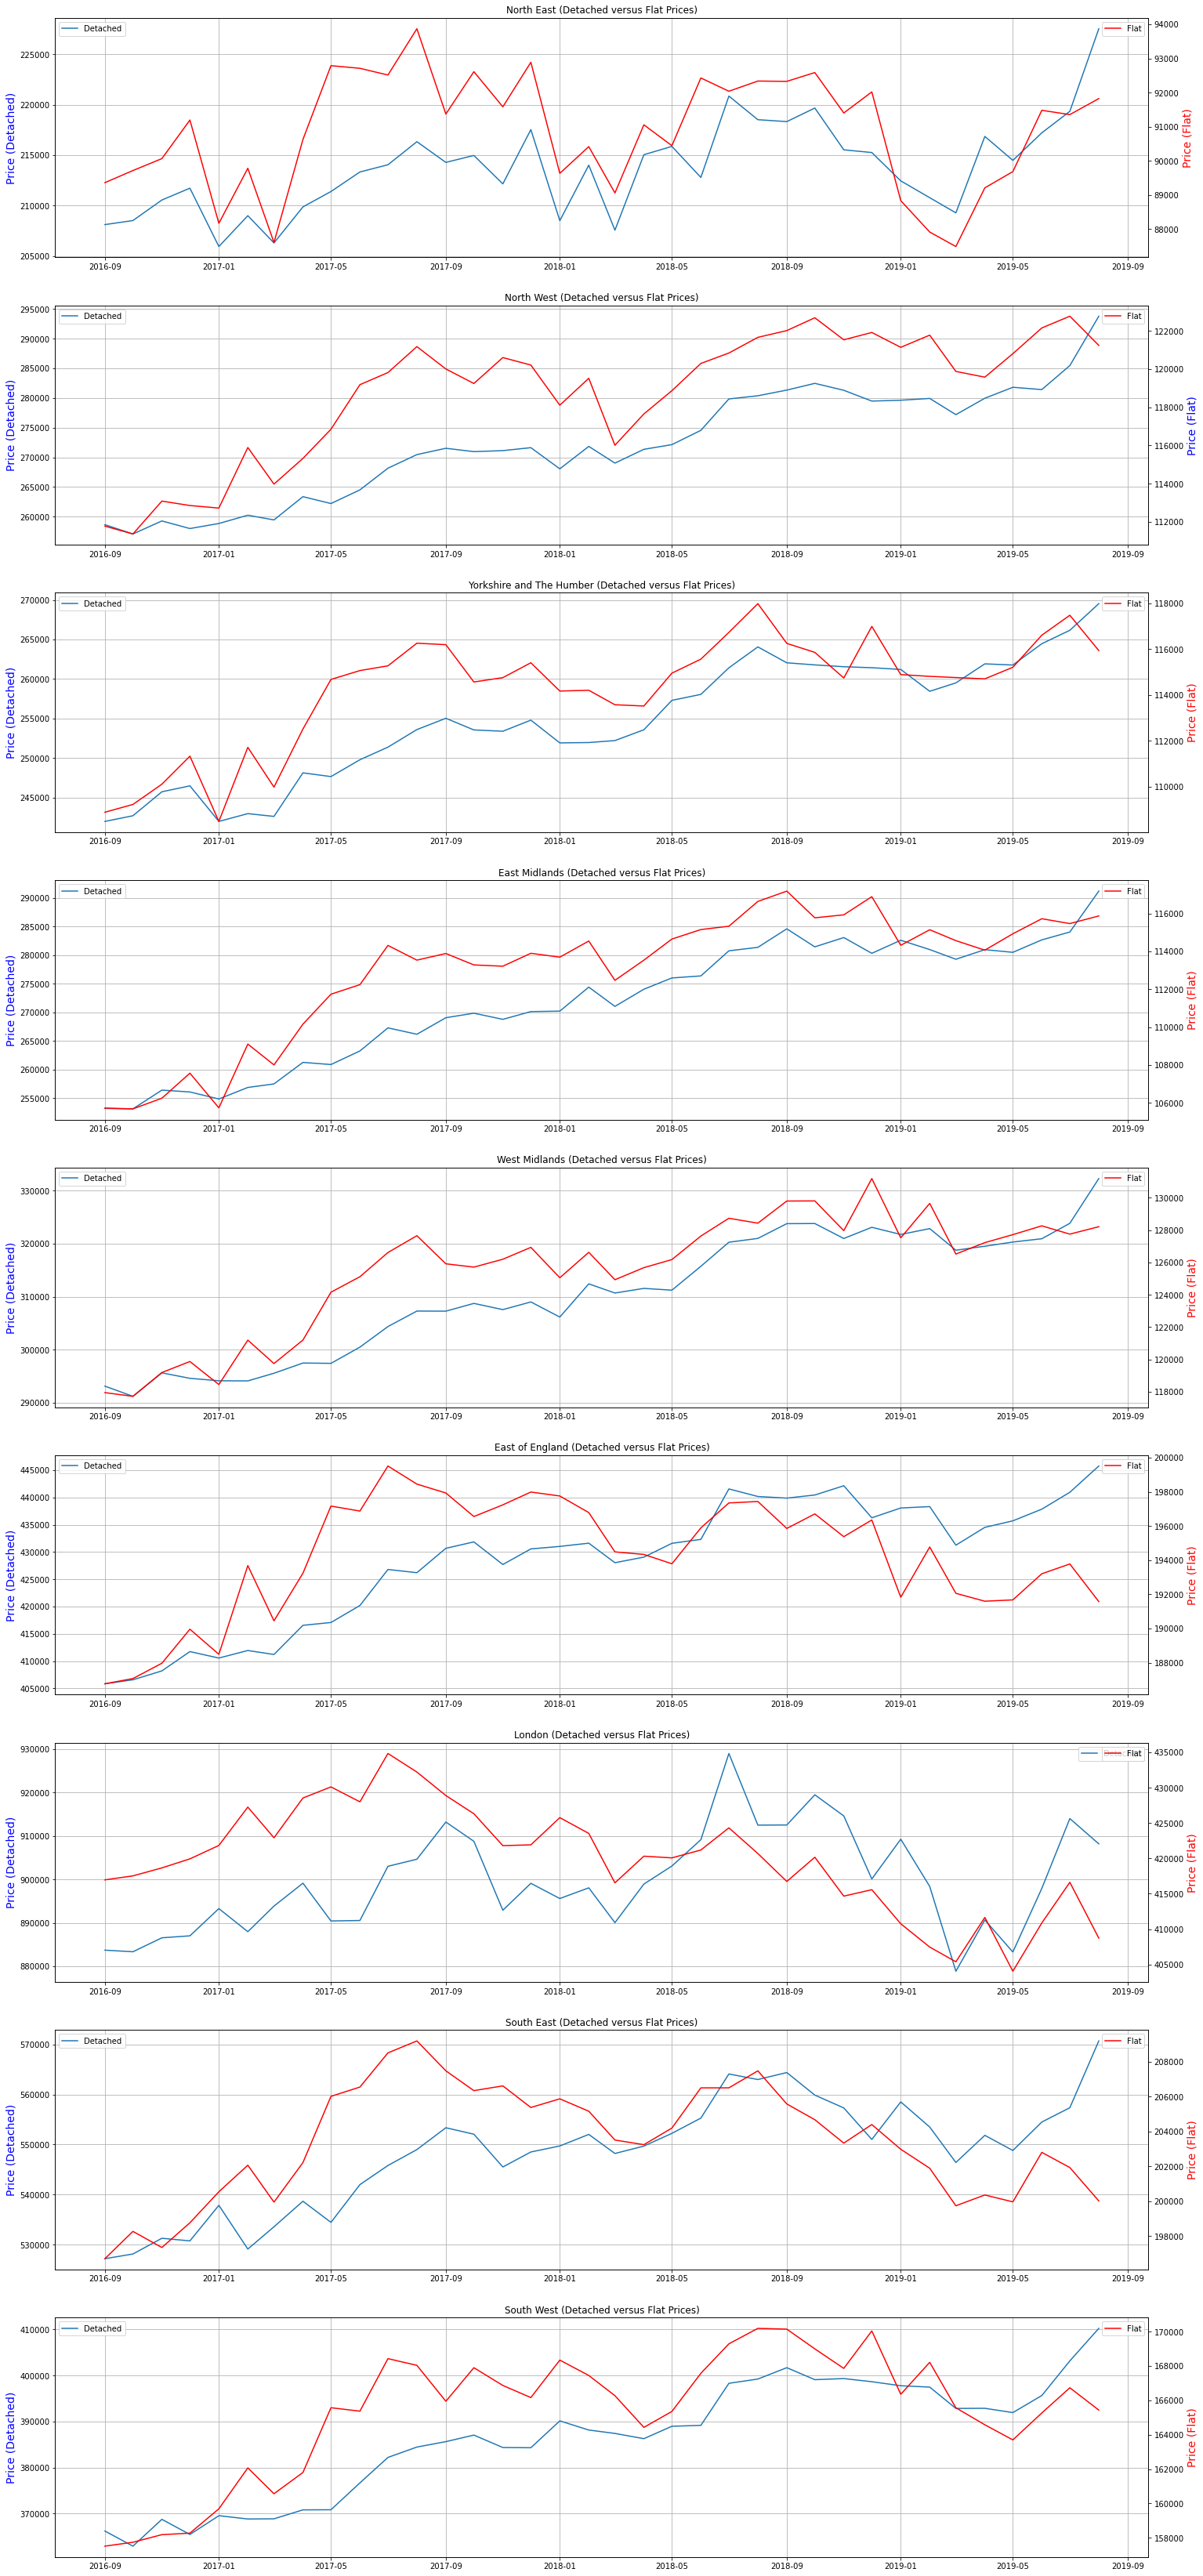

In [20]:
# Plotting flat and detached property prices for each region
fig, (a1, b1, c1, d1, e1, f1, g1, j1, k1) = plt.subplots(9, 1, figsize=(25, 30))
plt.subplots_adjust(left=None, bottom=1.5, right=None, top=3, wspace=None, hspace=None)

# North East
a1.plot(northeast.loc[:,'Detached'], label='Detached')
a2 = a1.twinx()  # instantiate a second axes that shares the same x-axis
a2.plot(northeast.loc[:,'Flat'], color='r', label = 'Flat')
a1.legend()
a2.legend()
a1.set_ylabel('Price (Detached)', fontsize=14, color='b')
a2.set_ylabel('Price (Flat)', fontsize=14, color='r')
a1.title.set_text('North East (Detached versus Flat Prices)')
a1.grid()


# North West
b1.plot(northwest.loc[:,'Detached'], label='Detached')
b2 = b1.twinx()  # instantiate a second axes that shares the same x-axis
b2.plot(northwest.loc[:,'Flat'], color='r', label = 'Flat')
b1.legend()
b2.legend()
b1.set_ylabel('Price (Detached)', fontsize=14, color='b')
b2.set_ylabel('Price (Flat)', fontsize=14, color='b')
b1.title.set_text('North West (Detached versus Flat Prices)')
b1.grid()

# Yorkshire and The Humber
c1.plot(yorkshire.loc[:,'Detached'], label='Detached')
c2 = c1.twinx()  # instantiate a second axes that shares the same x-axis
c2.plot(yorkshire.loc[:,'Flat'], color='r', label = 'Flat')
c1.legend()
c2.legend()
c1.set_ylabel('Price (Detached)', fontsize=14, color='b')
c2.set_ylabel('Price (Flat)', fontsize=14, color='r')
c1.title.set_text('Yorkshire and The Humber (Detached versus Flat Prices)')
c1.grid()

# East Midlands
d1.plot(eastmidlands.loc[:,'Detached'], label='Detached')
d2 = d1.twinx()  # instantiate a second axes that shares the same x-axis
d2.plot(eastmidlands.loc[:,'Flat'], color='r', label = 'Flat')
d1.legend()
d2.legend()
d1.set_ylabel('Price (Detached)', fontsize=14, color='b')
d2.set_ylabel('Price (Flat)', fontsize=14, color='r')
d1.title.set_text('East Midlands (Detached versus Flat Prices)')
d1.grid()

# West Midlands
e1.plot(westmidlands.loc[:,'Detached'], label='Detached')
e2 = e1.twinx()  # instantiate a second axes that shares the same x-axis
e2.plot(westmidlands.loc[:,'Flat'], color='r', label = 'Flat')
e1.legend()
e2.legend()
e1.set_ylabel('Price (Detached)', fontsize=14, color='b')
e2.set_ylabel('Price (Flat)', fontsize=14, color='r')
e1.title.set_text('West Midlands (Detached versus Flat Prices)')
e1.grid()

# East of England
f1.plot(eastofengland.loc[:,'Detached'], label='Detached')
f2 = f1.twinx()  # instantiate a second axes that shares the same x-axis
f2.plot(eastofengland.loc[:,'Flat'], color='r', label = 'Flat')
f1.legend()
f2.legend()
f1.set_ylabel('Price (Detached)', fontsize=14, color='b')
f2.set_ylabel('Price (Flat)', fontsize=14, color='r')
f1.title.set_text('East of England (Detached versus Flat Prices)')
f1.grid()

# London
g1.plot(london.loc[:,'Detached'], label='Detached')
g2 = g1.twinx()  # instantiate a second axes that shares the same x-axis
g2.plot(london.loc[:,'Flat'], color='r', label ='Flat')
g1.legend()
g2.legend()
g1.set_ylabel('Price (Detached)', fontsize=14, color='b')
g2.set_ylabel('Price (Flat)', fontsize=14, color='r')
g1.title.set_text('London (Detached versus Flat Prices)')
g1.grid()

# South East
j1.plot(southeast.loc[:,'Detached'], label='Detached')
j2 = j1.twinx()  # instantiate a second axes that shares the same x-axis
j2.plot(southeast.loc[:,'Flat'], color='r', label = 'Flat')
j1.legend()
j2.legend()
j1.set_ylabel('Price (Detached)', fontsize=14, color='b')
j2.set_ylabel('Price (Flat)', fontsize=14, color='r')
j1.title.set_text('South East (Detached versus Flat Prices)')
j1.grid()

# South West
k1.plot(southwest.loc[:,'Detached'], label='Detached')
k2 = k1.twinx()  # instantiate a second axes that shares the same x-axis
k2.plot(southwest.loc[:,'Flat'], color='r', label = 'Flat')
k1.legend()
k2.legend()
k1.set_ylabel('Price (Detached)', fontsize=14, color='b')
k2.set_ylabel('Price (Flat)', fontsize=14, color='r')
k1.title.set_text('South West (Detached versus Flat Prices)')
k1.grid()

### **Section 2.2: Observations on Trends**

In general, flat prices seem to be below the prices of detached properties, although there are time periods when this changes around and detached properties worth less than flats. Also, upward trends can be observed in most plots with regard to both detached and flat properties, obviously with some exceptions (see below). There are also regions where there is clear seasonality in the prices: during summer months the prices tend to shoot up, whilst during winter months they tend to be low. An early explanation could be that regions where seasonality is clearly observable with big variation in prices between summer and winter, population of the region is not too big. On the contrary, in populous regions of the UK, where the influx/outflux of people and other unknown factors affecting property prices is larger, this seasonality tend to disappear. Moreover, flat property prices seem to vary to a greater extent than that of detached properties. 


* **`North East`:** Around March in both 2017 and 2018 both detached and flat prices start rapidly increasing, then platouing as September approaches (with busiest period occuring in the months before September, that is, summer!). Both prices seem to take a dive around January, to have the pattern repeat itself again. Although the seasonal pattern is observable, there also seems to be a gentle upward trend in Detached property prices over the years.<br>


* **`North West`:** Flat prices here also exhibit an upward trend with the same seasonal trend that was observed with regard to 'North East'. Detached property prices, on the other hand, show a positive trend but without the seasonal component to it. <br>


* **`Yorkshire and The Humber`:** Flat prices show their seasonal high points (in September) and rapidly rising property prices during summer in each year as before, although the dive afterward is less eminent. There also seem to be a subtle positive trend in there. Detached property prices show similar seasonality (with less drop after summers), and with an upward trend too. <br>


* **`East Midlands`:** Flat prices still show some seasonality during summer and winter times (although to a lesser and lesser degree) with an upward trend. Detached property prices exhibit a strong upward trend without any seasonality. 


* **`West Midlands`:** Following the abovementioned trends, West Midlands flat prices have some seasonality and strong upward trend, but detached property prices show nothing but a positive trend. 


* **`East of England`:** It seems as if flat prices show more variation than before with an initially positive trend turning negative around 2018 without a rebound in the summer of 2019. Contrarily, detached property prices show a strong upward trend throughout the 3 years with minor price collapses. 


* **`London`:** Property prices here look the most volatile both with respect to flats and detached properties. After the summer of 2017, flat prices plummet until the end of the observed 3 years period without a clear reason of seasonality. Detached property prices fluctuate wildly with some seasonality during summers and winters observed before at other regions. 


* **`South East`:** Flat prices show a slight negative trend over the observed period, with noticable seasonality (which after 2018 seem to diminish). Detached property prices exhibit an upward trend throughout with some possible seasonality. 


* **`South West`:** Generally, upward trends with respect to both flats and detached properties, with summer and winter seasonality for flat prices. 


As an additional visualition, one could divide the datasets according to seasons (Winter, Spring, Summer, Autumn), and calculate percentage change in prices with respect to both flats and detached properties. After that, a bar chart could depict the change displaying all regions together in seperate plots. 



## **Part 3: Analysing Price Changes in Areas**

### **Section 3.1: Calculating flats' property price change (between July 2017 and 2018) in each area**

In [21]:
# Creating a separate dataframe with relevant columns (Area, Month, Flat, Region) 
price_difference = area_data[['Area', 'Month', 'Flat', 'Region']].copy()
price_difference.head()

,Area,Month,Flat,Region
0,Hartlepool,2016-09-01,62078.21,North East
1,Hartlepool,2016-10-01,61893.84,North East
2,Hartlepool,2016-11-01,61909.34,North East
3,Hartlepool,2016-12-01,62919.44,North East
4,Hartlepool,2017-01-01,60770.81,North East


In [22]:
# Creating dataframe for all rows observed in July 2017
data_2017 = price_difference[price_difference['Month'] == '2017-07-01']

# Creating dataframe for all rows observed in July 2018
data_2018 = price_difference[price_difference['Month'] == '2018-07-01']

# Checking if results are correct
print("Flat prices in July 2017:")
display(data_2017.head())
print()
print("Flat prices in July 2018:")
display(data_2018.head())


Flat prices in July 2017:


,Area,Month,Flat,Region
10,Hartlepool,2017-07-01,65007.84,North East
46,Middlesbrough,2017-07-01,69163.07,North East
82,Redcar and Cleveland,2017-07-01,65507.81,North East
118,Stockton-on-Tees,2017-07-01,83599.33,North East
154,Darlington,2017-07-01,87041.38,North East



Flat prices in July 2018:


,Area,Month,Flat,Region
22,Hartlepool,2018-07-01,61116.82,North East
58,Middlesbrough,2018-07-01,69313.91,North East
94,Redcar and Cleveland,2018-07-01,64802.80,North East
130,Stockton-on-Tees,2018-07-01,83654.55,North East
166,Darlington,2018-07-01,83679.32,North East


In [23]:
# Separating prices from July 2017 and 2018, area column and region column
prices17 = data_2017['Flat']
prices17.reset_index(drop=True, inplace=True)
prices18 = data_2018['Flat']
prices18.reset_index(drop=True, inplace=True)
area = data_2017['Area']
area.reset_index(drop=True, inplace=True)
region = data_2017['Region']
region.reset_index(drop=True, inplace=True)

# Assigning the separated columns to a new dataframe
total = pd.DataFrame().assign(Area=area, Price_17 = prices17, Price_18=prices18 )


In [24]:
# Calculating change between July 2017 and 2018 prices
difference=total['Price_18'] - total['Price_17']

# Assigning the price change results to the dataframe
total = total.assign(Price_change=difference, Region=region)
total.head()

,Area,Price_17,Price_18,Price_change,Region
0,Hartlepool,65007.84,61116.82,-3891.02,North East
1,Middlesbrough,69163.07,69313.91,150.84,North East
2,Redcar and Cleveland,65507.81,64802.80,-705.01,North East
3,Stockton-on-Tees,83599.33,83654.55,55.22,North East
4,Darlington,87041.38,83679.32,-3362.06,North East


In [25]:
# Adding percentage change column to dataframe
def percentage_change(col1,col2):
    return ((col2 - col1) / col1) * 100

total['Percentage change'] = percentage_change(total['Price_17'],total['Price_18'])  

total.head()

,Area,Price_17,Price_18,Price_change,Region,Percentage change
0,Hartlepool,65007.84,61116.82,-3891.02,North East,-5.99
1,Middlesbrough,69163.07,69313.91,150.84,North East,0.22
2,Redcar and Cleveland,65507.81,64802.80,-705.01,North East,-1.08
3,Stockton-on-Tees,83599.33,83654.55,55.22,North East,0.07
4,Darlington,87041.38,83679.32,-3362.06,North East,-3.86


### **Section 3.2: Visualising change in flat property prices in each area**

In [26]:
# Grouping together areas by regions
gbyRegion = total.groupby(by = 'Region', dropna=False)

northeast = gbyRegion.get_group('North East')
northwest = gbyRegion.get_group('North West')
yorkshire = gbyRegion.get_group('Yorkshire and The Humber')
eastmidlands = gbyRegion.get_group('East Midlands')
westmidlands = gbyRegion.get_group('West Midlands')
southwest = gbyRegion.get_group('South West')
eastofengland = gbyRegion.get_group('East of England')
southeast = gbyRegion.get_group('South East')
london = gbyRegion.get_group('London')

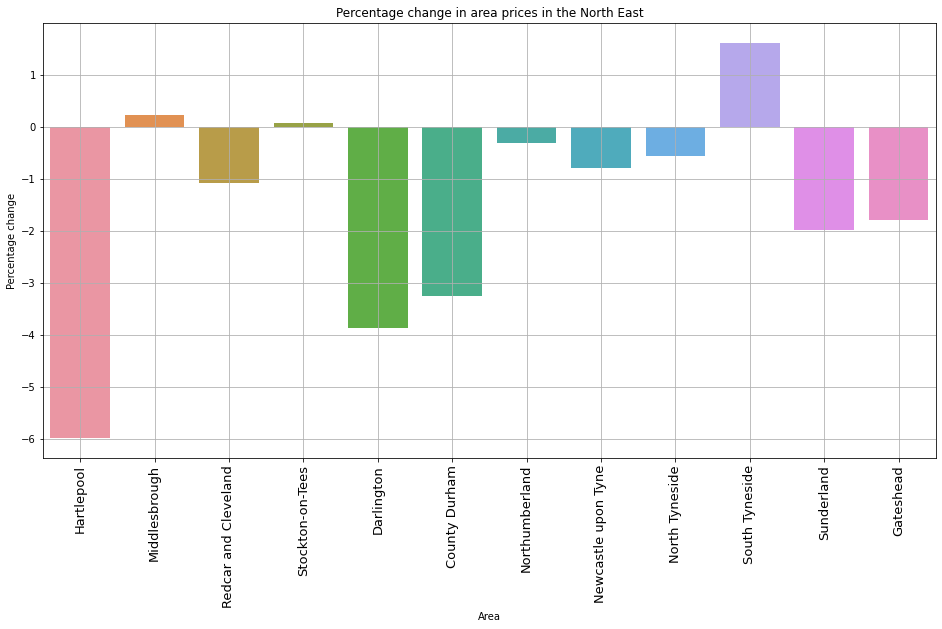

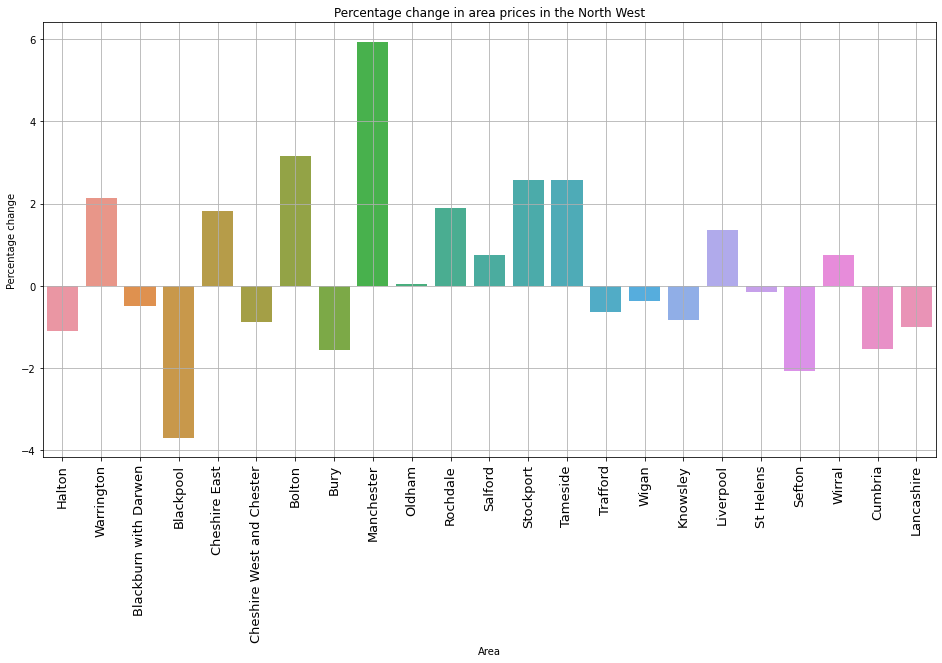

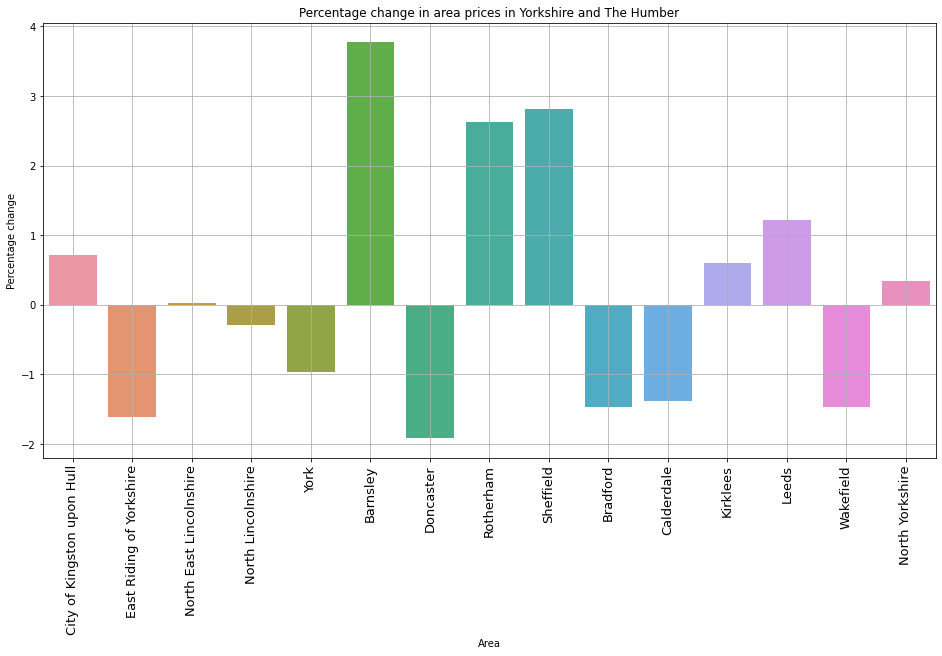

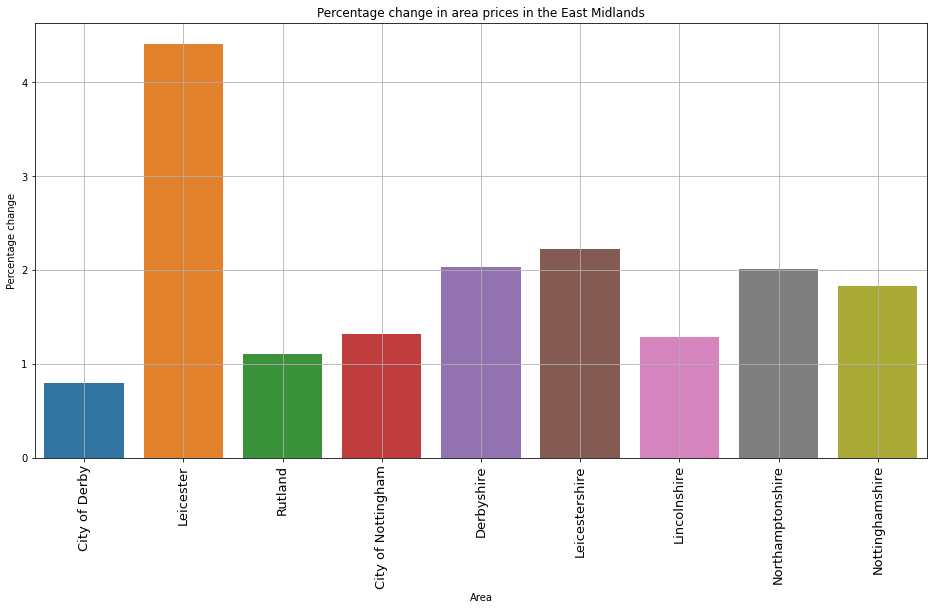

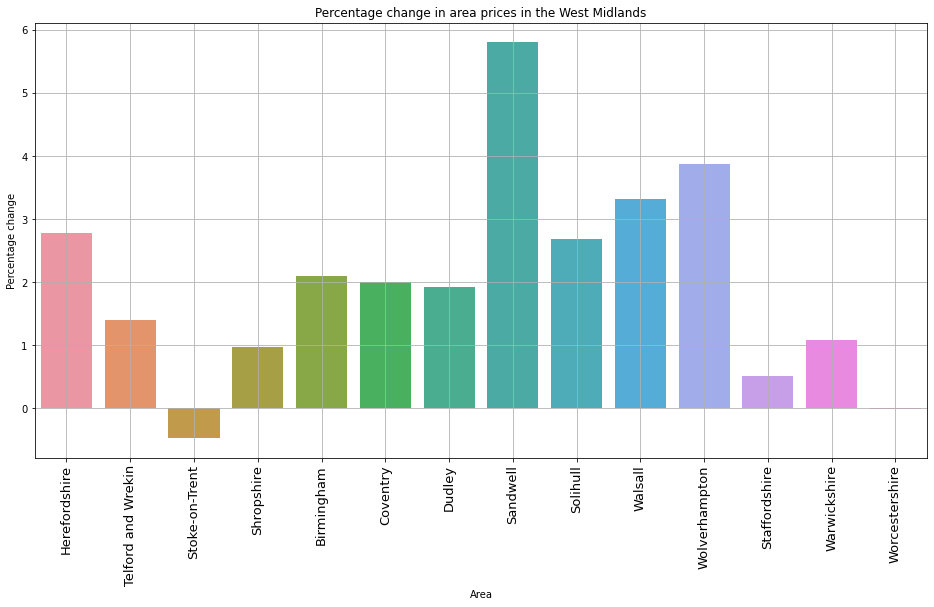

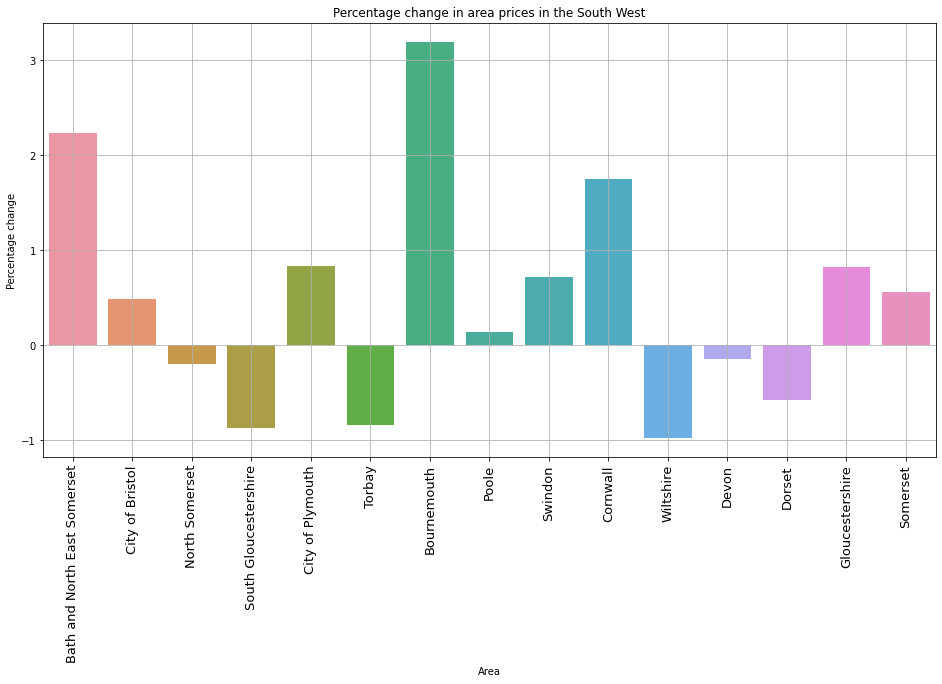

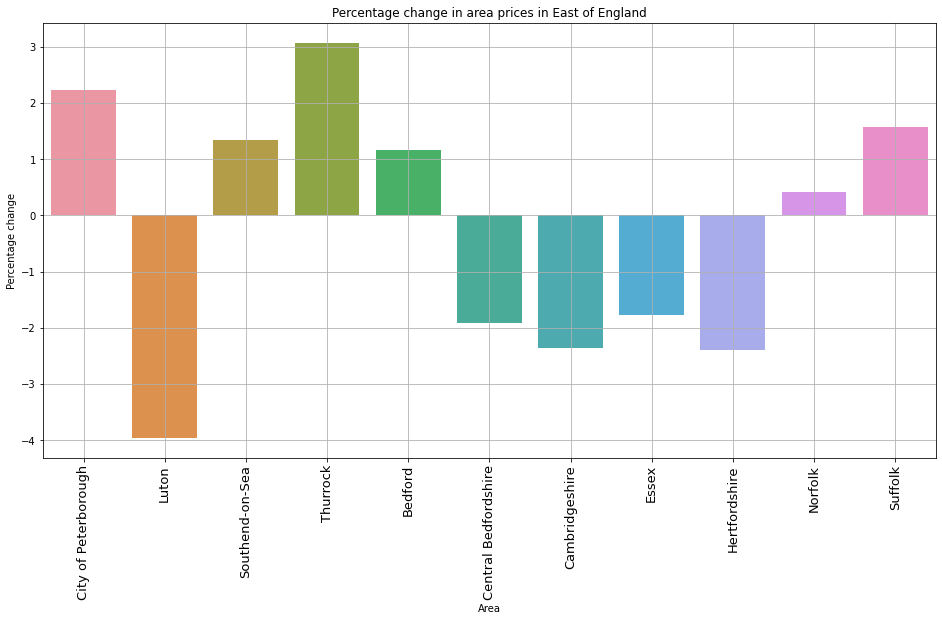

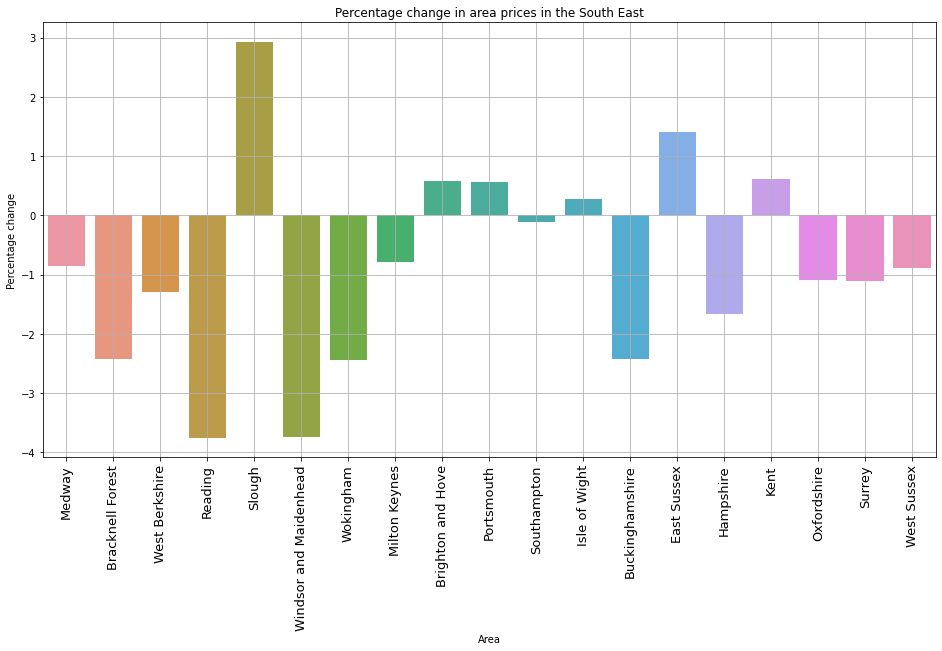

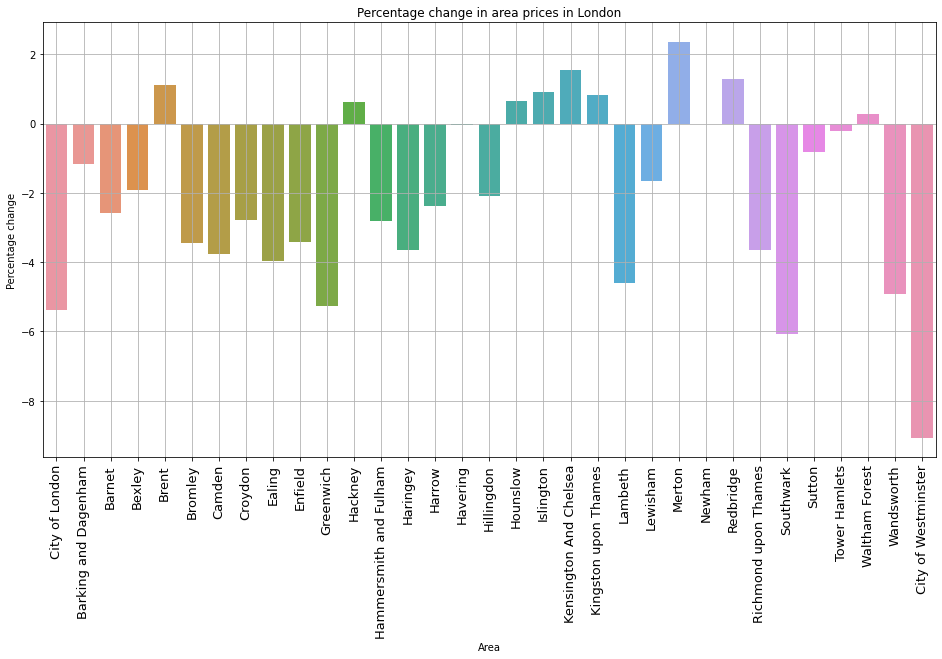

In [27]:
# Drawing plots of regions with areas that they contain, using barcharts
# depicting the percentage changes calculated above

import seaborn as sns
plt.figure(figsize=(16,8))
sns.barplot(x="Area", y="Percentage change", data=northeast)
plt.title("Percentage change in area prices in the North East")
plt.grid()
_x = plt.xticks(rotation=90, fontsize=13)

plt.figure(figsize=(16,8))
sns.barplot(x="Area", y="Percentage change", data=northwest)
plt.title("Percentage change in area prices in the North West")
plt.grid()
_x = plt.xticks(rotation=90, fontsize=13)

plt.figure(figsize=(16,8))
sns.barplot(x="Area", y="Percentage change", data=yorkshire)
plt.title("Percentage change in area prices in Yorkshire and The Humber")
plt.grid()
_x = plt.xticks(rotation=90, fontsize=13)

plt.figure(figsize=(16,8))
sns.barplot(x="Area", y="Percentage change", data=eastmidlands)
plt.title("Percentage change in area prices in the East Midlands")
plt.grid()
_x = plt.xticks(rotation=90, fontsize=13)

plt.figure(figsize=(16,8))
sns.barplot(x="Area", y="Percentage change", data=westmidlands)
plt.title("Percentage change in area prices in the West Midlands")
plt.grid()
_x = plt.xticks(rotation=90, fontsize=13)

plt.figure(figsize=(16,8))
sns.barplot(x="Area", y="Percentage change", data=southwest)
plt.title("Percentage change in area prices in the South West")
plt.grid()
_x = plt.xticks(rotation=90, fontsize=13)

plt.figure(figsize=(16,8))
sns.barplot(x="Area", y="Percentage change", data=eastofengland)
plt.title("Percentage change in area prices in East of England")
plt.grid()
_x = plt.xticks(rotation=90, fontsize=13)

plt.figure(figsize=(16,8))
sns.barplot(x="Area", y="Percentage change", data=southeast)
plt.title("Percentage change in area prices in the South East")
plt.grid()
_x = plt.xticks(rotation=90, fontsize=13)

plt.figure(figsize=(16,8))
sns.barplot(x="Area", y="Percentage change", data=london)
plt.title("Percentage change in area prices in London")
plt.grid()
_x = plt.xticks(rotation=90, fontsize=13)


### **Section 3.3: Observations on Results**

In the above plots, areas are grouped together according to their regions. The respective regions could be further grouped together into four groups based on the trends one can observe: (1) regions where areas experience only positive change between property prices between July 2017 and July 2018, (2) regions where areas show mostly negative property price changes, (3) regions where areas exhibit mostly positive property prices, and (4) regions where property prices show both positive and negative changes in a roughly equal number. 

* **`North East:`** This regions' areas could be placed in group (2), that is, mostly negative property price changes. Three of the areas showed a relatively big drop in their property values - Hartlepool being the most excessive case with its almost -6% change, whilst the remaining ones experienced only minor price drops. Interestingly, South Tyneside is the only area in this region where flat property prices have grown (1.61%).


* **`North West:`** This regions' areas could be placed in group (4), that is, property prices showing both positive and negative changes in a roughly equal number. Probably those areas experiencing positive changes seen a larger positive change than those areas where the price change was negative. The biggest negative price drop can be accounted for Blackpool with its negative 3.9 percentage. On the other hand, Machester showed the largest positive increase in prices with an almost +6 percentage property price increase. 


* **`Yorkshire and The Humber:`** Similarly, these areas could be placed in group (4), with Barnsley(+3.77%), Rotherham(+2.63%) and Sheffield(+2.81%) showing the highest increases in their property prices. 


* **`East Midlands:`** The areas in this region could be placed in group (1), that is, all areas experienced some serious positive price changes in their properties (Leicester being the highest with its almost +4.5% change). 


* **`West Midlands:`** The areas in this region could be placed in group (3), that is, areas experiencing mostly (with one exception in this case) positive price changes. The highest price change achiever is Sandwell with its almost +7% change, whilst the only area that showed a slight price drop is Stoke-on-Trent with its -0.5% change.


* **`South West:`** Probably group (4), as areas show mixed price changes, Bournemouth being the largest increase with its ~ +3.3% change. 


* **`East of England:`** Similarly, areas in this region are also characterised by mixed price changes, therefore could be placed in group (4). 


* **`South East:`** The areas in this region show mostly negative trends in price changes, therefore will be placed into group (2).


* **`London:`** London areas' property prices were probably hit by most severely, although there are a few exceptions here too (making it to group (2)). The are hit by the most is City of Westminster, followed by Southwark and City of London, whilst the largest increaser is Merton. 


| Group     |      Regions (based on Area property price changes)           | 
|:--------------|:-----------------------------|
|Only positive (Group1)  | East Midlands                 | 
| Mostly negative  (Group 2)  |   North East, South East, London |
|Mostly positive  (Group 3) | West Midlands    | 
|Mixed   (Group 4)    | North West, Yorkshire and The Humber,  South West, East of England   |    

According to the short summary table drawn above, the Midlands (East and West) experienced a very positive year in terms of price changes of their flats, whilst North and South East coupled with London exhibited large property price drops in their respective areas. North West, Yorkshire and The Humber, South West and East of England's areas saw both positive and negative flat price changes in their respective areas in a roughly equal amount. 

## **Part 4: Statistical Analysis**
Using the **area data** in this section and the work conducted in Section 3.1 on price changes, it is being investigated whether there is evidence that the change in the price of flats has affected all the regions similarly. 

### **Section 4.1: Creating a dataframe by crosstabulation for Chi-square test**

In [28]:
# Creating an appropriate dataframe with relevant columns
final_form = total[['Area', 'Region', 'Price_change']]
final_form.head()

,Area,Region,Price_change
0,Hartlepool,North East,-3891.02
1,Middlesbrough,North East,150.84
2,Redcar and Cleveland,North East,-705.01
3,Stockton-on-Tees,North East,55.22
4,Darlington,North East,-3362.06


In [29]:
# Function that 'decides' whether 'Price_change' constitutes to 'Increase'
# 'Decrease' or 'No change'

def increase_decrease(row):
    if (row.Price_change > 0):
        return 'Increase'
    if (row.Price_change < 0):
        return 'Decrease'
    else:
        return 'No change'

# Applying the function to the 'final_form' dataframe
final_form = final_form.assign(Change = final_form.apply(increase_decrease, axis=1))

In [30]:
# Checking the resulting dataframe 
final_form.head()

,Area,Region,Price_change,Change
0,Hartlepool,North East,-3891.02,Decrease
1,Middlesbrough,North East,150.84,Increase
2,Redcar and Cleveland,North East,-705.01,Decrease
3,Stockton-on-Tees,North East,55.22,Increase
4,Darlington,North East,-3362.06,Decrease


In [31]:
# Creating a crosstabulated dataframe with regions as headers, and 
# 'Increase'/'Decrease' as indexes
crosstabulated = pd.crosstab(final_form.Change, [final_form.Region])
crosstabulated

Region,East Midlands,East of England,London,North East,North West,South East,South West,West Midlands,Yorkshire and The Humber
Change,,,,,,,,,
Decrease,0,5,23,9,12,13,6,2,7
Increase,9,6,10,3,11,6,9,12,8


### **Section 4.2: Chi-square Test Analysis**

A Chi-Square statistic is used for testing relationships between categorical variables. The **null hypothesis** of the Chi-square test is that **no relationship exists between the categorical variables in the population**; they are independent. 

In this paper's analysis then the **null hypothesis** is that the change in the price of flats has affected all regions similarly. Consequently, the **alternative hypothesis** is that the change in the price of flats has not affected each regions in a similar fashion, i.e., there is an association between the two variables. 

**`Null Hypothesis:`** There is not a relationship between change in the price of flats and the regions (i.e., regions are affected similarly, that is, the two variables are independent).

**`Alternative Hypothesis:`** There is a relationsip between the change in the price of flats and the regions (i.e., regions are affected differently, that is, the two variables are dependent).


That is, the Chi-square test determines if a difference between observed data and expected data is due to chance, or if it is due to a relationship between the variables we are studying. 

"The Chi-square test tests this by comparing the observed pattern of responses in the cells to the pattern that would be expected if the variables were truly independent of each other (null hypothesis). Calculating the Chi-square test statistic and comparing it against a critical value from the Chi-square distribution allows the researcher to assess whether the observed cell counts are significantly different from the expected cell counts. If the observed distribution is sufficiently different than the expected distribution (no relationship, i.e., the null hypothesis), one can reject the null hypothesis and conclude that the variables are related." (source: https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/using-chi-square-statistic-in-research/) 

The **degrees of freedom (df)** is simply the number of classes that can vary independently minus one. In this case, there are 9 regions, hence df=8.


The **Chi-squared test statistic** is a single-number summary of the difference between the obtained frequencies and the frequencies one would expect if there was no association between the two analysed variables. The bigger this number is, the greater the difference between the observed and expected frequencies. 

The **p-value** of the Chi-square determines the statistical significance of the relationship between the studied variables. If p < 0.05 (this analysis's chosen significance level), we can say that there is a statistically significant relationship between the two variables (therefore rejecting the null hypothesis). Why? Becuase a very small p-value means that the null hypothesis (see above) is not very compatible with the data that is being analysed. 

In [32]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

test_stat, p_value, dof, expected = stats.chi2_contingency(crosstabulated, correction=False)

print('There are %d degrees of freedom' % dof)
print('The chi-squared test statistic is %4.2f' % test_stat)
print('The p-value is', (p_value))
print()

# Stating the chosen significance level
alpha = 0.05

# Function that 'decides' whether null hypothesis is rejected or not
if p_value <= alpha:
    print('Observed two variables are dependent (hence, reject H0)')
else:
    print('Observed two variables are independent (hence, H0 holds true)')

There are 8 degrees of freedom
The chi-squared test statistic is 27.60
The p-value is 0.0005576314604275119

Observed two variables are dependent (hence, reject H0)


### **Section 4.3: Interpreting the Results**

* Since the calculated p-value (~0.000557) is smaller than the chosen significance level of 0.05, it can be said that there is a statistically significant relationship between the change in prices of flats and regions. That is, the **null hypothesis** stated above **is rejected** and it is concluded that the different regions are affected differently by the change in the prices of flats, i.e., the two variables (price change of flats regions) are dependent (not due to chance). This result is not surprising at all: in Section 3.3, after grouping together observations based on price ranges in the respective regions it was clear that some regions are clerly affected by the change in the flat prices more than other regions. 


* The above Chi-square test only revealed the probability of independence/dependence of the variables. It does not tell anything about the details of the relationship between the change in prices of flats and regions or anything about a causal relationship between the two variables. So we cannot say that a specific region will cause flat prices to decrease/increase.  That is a different task, requiring a different method to be used. 


* Moreover, although the p-value suggested that there is a relationship between the two variables, one cannot say it with absolute certainty that the null hypothesis is not true.


* Also, the p-value has nothing to do with the magnitude (effect size) or the importance of an observed relationship between two variables. For that, Cramer's V could be calculated.

